# Exploratory data analysis of Parker Solar Probe (PSP) magnetic field time series

In [3]:

import pandas as pd
import random
import cdflib
import math as m
from matplotlib import pyplot as plt
import os

while ".toplevel" not in os.listdir():
    os.chdir("..")

from data_import_funcs import read_cdfs, extract_components

In [4]:
cdf_file = cdflib.CDF("data_raw\psp\psp_fld_l2_mag_rtn_2018110400_v01.cdf")

In [5]:
print(cdf_file.globalattsget(expand = False))

{'TITLE': 'PSP FIELDS Fluxgate Magnetometer (MAG) data', 'Project': 'PSP', 'Discipline': ['Solar Physics>Heliospheric Physics', 'Space Physics>Interplanetary Studies'], 'Source_name': 'PSP_FLD>Parker Solar Probe FIELDS', 'Descriptor': 'MAG_RTN>Fluxgate Magnetometer data in RTN coordinates', 'Data_type': 'L2>Level 2 Data', 'Data_version': '01', 'TEXT': ['PSP FIELDS Fluxgate Magnetometer data. Time resolution varies with instrument mode, ranging from 2.3-292.9 samples/sec, corresponding to 2-256 samples per 0.874 seconds (0.874 = 2^25 / 38.4 MHz, see reference [2]).', 'The Magnetometer has 4 ranges - +/-1024, +/-4096, +/-16,384, +/-65,536 nT, selected by the ranging algorithm, based on the ambient magnetic field. Precision is +/- 15 bits, based on the 16-bit ADC.', 'References:', '1. Fox, N.J., Velli, M.C., Bale, S.D. et al. Space Sci Rev (2016) 204: 7. https://doi.org/10.1007/s11214-015-0211-6', '2. Bale, S.D., Goetz, K., Harvey, P.R. et al. Space Sci Rev (2016) 204: 49. https://doi.org

In [5]:
print(cdf_file.cdf_info()['zVariables']) 

['epoch_mag_RTN', 'psp_fld_l2_mag_RTN', 'psp_fld_l2_mag_RTN_MET', 'psp_fld_l2_mag_RTN_range', 'psp_fld_l2_mag_RTN_mode', 'psp_fld_l2_mag_RTN_rate', 'psp_fld_l2_mag_RTN_packet_index', 'label_RTN', 'component_index_RTN', 'epoch_quality_flags', 'psp_fld_l2_quality_flags']


In [6]:
print(cdf_file.varinq('psp_fld_l2_mag_RTN'))

{'Variable': 'psp_fld_l2_mag_RTN', 'Num': 1, 'Var_Type': 'zVariable', 'Data_Type': 21, 'Data_Type_Description': 'CDF_REAL4', 'Num_Elements': 1, 'Num_Dims': 1, 'Dim_Sizes': [3], 'Sparse': 'No_sparse', 'Last_Rec': 3164053, 'Rec_Vary': True, 'Dim_Vary': [-1], 'Pad': array([-1.e+30], dtype=float32), 'Compress': 6, 'Block_Factor': 5462}


In [7]:
print(cdf_file.varattsget('psp_fld_l2_mag_RTN'))

{'FIELDNAM': 'MAG B_RTN', 'FORMAT': 'E12.2', 'LABLAXIS': 'B_RTN', 'VAR_TYPE': 'data', 'FILLVAL': -1e+31, 'DEPEND_0': 'epoch_mag_RTN', 'DEPEND_1': 'component_index_RTN', 'DISPLAY_TYPE': 'time_series', 'VALIDMIN': array([-65536., -65536., -65536.], dtype=float32), 'VALIDMAX': array([65536., 65536., 65536.], dtype=float32), 'UNITS': 'nT', 'SI_conv': '1.0e-9>Tesla', 'CATDESC': 'Magnetic field in RTN coordinates (full cadence)', 'SCALETYP': 'linear', 'LABL_PTR_1': 'label_RTN'}


In [8]:
print(cdf_file.varattsget('epoch_mag_RTN'))

{'FIELDNAM': 'epoch_mag_RTN', 'MONOTON': 'INCREASE', 'FORMAT': 'I22', 'LABLAXIS': 'Epoch', 'VAR_TYPE': 'support_data', 'FILLVAL': -9223372036854775808, 'VALIDMIN': 315576066184000000, 'VALIDMAX': 1577880069183999999, 'SCALEMIN': 594561669184000000, 'SCALEMAX': 594583269184000000, 'UNITS': 'ns', 'CATDESC': 'Time in TT2000 for full cadence MAG waveform data', 'TIME_BASE': 'J2000', 'SCALETYP': 'linear', 'TIME_SCALE': 'Terrestrial Time', 'REFERENCE_POSITION': 'Rotating Earth Geoid'}


In [8]:
psp_data = read_cdfs(["data_raw\psp\psp_fld_l2_mag_rtn_2018110400_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110406_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110412_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110418_v01.cdf", 
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110500_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110506_v01.cdf"
                      ], 
                      {'epoch_mag_RTN':(0), 'psp_fld_l2_mag_RTN':(0,3), 'label_RTN':(0,3)})

reading file  data\PSP\psp_fld_l2_mag_rtn_2018110400_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110406_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110412_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110418_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110500_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110506_v01.cdf
Done reading data


In [9]:
psp_data_ready = extract_components(psp_data, var_name='psp_fld_l2_mag_RTN', label_name='label_RTN', time_var='epoch_mag_RTN', dim=3)

psp_df = pd.DataFrame(psp_data_ready)

psp_df['Time'] = pd.to_datetime('2000-01-01 12:00') + pd.to_timedelta(psp_df['epoch_mag_RTN'], unit= 'ns')
psp_df = psp_df.drop(columns = 'epoch_mag_RTN').set_index('Time')

In [10]:
print(psp_df.head())
print(psp_df.notnull().sum())
print(psp_df.isnull().sum())

                                     B_R       B_T        B_N
Time                                                         
2018-11-04 00:01:09.188621440 -66.046837 -4.066133 -21.885740
2018-11-04 00:01:09.195448064 -66.016045 -4.151718 -21.756538
2018-11-04 00:01:09.202274688 -65.888741 -4.362415 -21.620611
2018-11-04 00:01:09.209101440 -65.950851 -4.364508 -21.652880
2018-11-04 00:01:09.215928064 -65.975548 -4.533356 -21.834236
B_R    32973889
B_T    32973889
B_N    32973889
dtype: int64
B_R    0
B_T    0
B_N    0
dtype: int64


In [11]:
df = psp_df

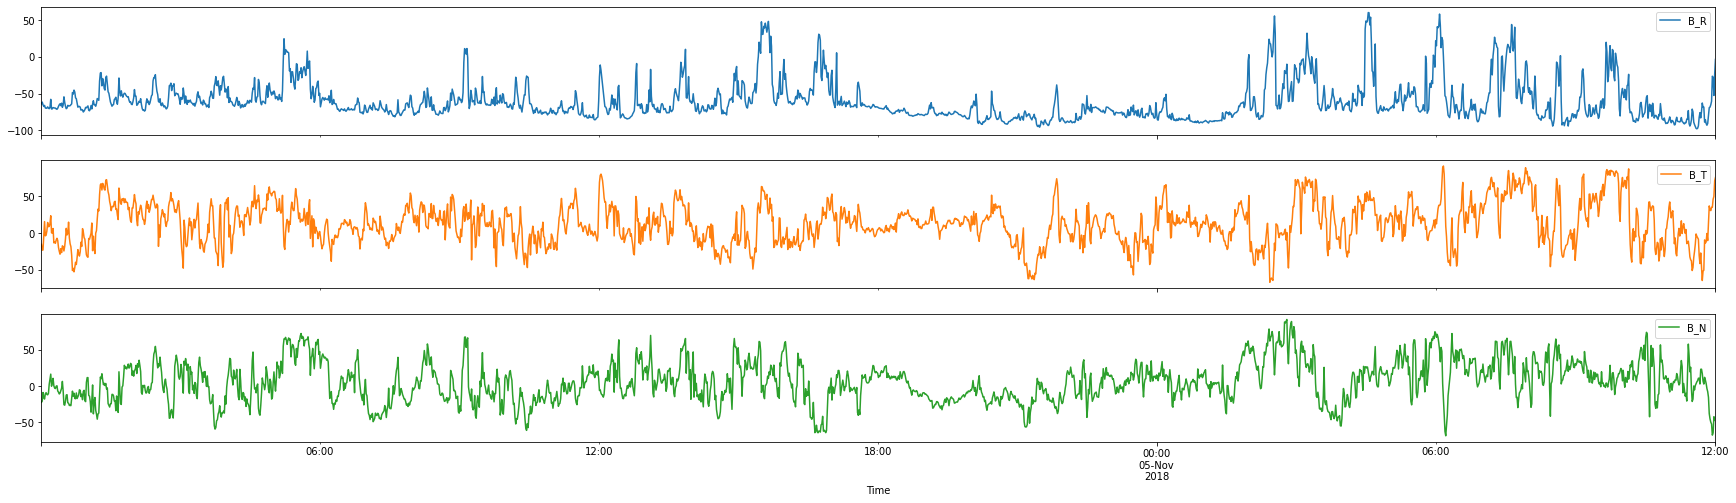

In [12]:
sample = df.resample('60S').mean().plot(subplots = True, figsize=(30, 8))

We wish to resample to a lower frequency so as to standardise correlation times between spacecraft.

In [13]:
df = df.resample('0.75S').mean()
print(df.head())
print(df.notnull().sum())
print(df.isnull().sum())

                               B_R        B_T        B_N
Time                                                    
2018-11-04 00:01:09.000 -66.008367  -5.284080 -22.126701
2018-11-04 00:01:09.750 -65.720354  -3.337923 -23.220996
2018-11-04 00:01:10.500 -66.343980  -7.998673 -20.585728
2018-11-04 00:01:11.250 -66.241503 -13.736805 -18.114344
2018-11-04 00:01:12.000 -63.788294 -16.087522 -22.644000
B_R    172801
B_T    172801
B_N    172801
dtype: int64
B_R    0
B_T    0
B_N    0
dtype: int64


TESTING SCALAR AND VECTOR SPLITTING TO PREP DATA FOR CALCULATING VECTOR STRUCTURE FUNCTIONS IN THE TERMINAL_PREPROCESSING.py CODE

In [14]:
inputs_list_raw = np.split(df[:50000], 5) 
inputs_list = [calcs.normalize(i) for i in inputs_list_raw]

In [15]:
inputs_list_raw[0]

,B_R,B_T,B_N
Time,,,
2018-11-04 00:01:09.000,-66.008367,-5.284080,-22.126701
2018-11-04 00:01:09.750,-65.720354,-3.337923,-23.220996
2018-11-04 00:01:10.500,-66.343980,-7.998673,-20.585728
2018-11-04 00:01:11.250,-66.241503,-13.736805,-18.114344
2018-11-04 00:01:12.000,-63.788294,-16.087522,-22.644000
...,...,...,...
2018-11-04 02:06:05.250,-65.572315,24.933017,26.754377
2018-11-04 02:06:06.000,-65.925001,29.678926,18.682530
2018-11-04 02:06:06.750,-65.578275,32.409524,12.111317


Text(0.5, 1.0, 'Single vector interval pre-standardisation')

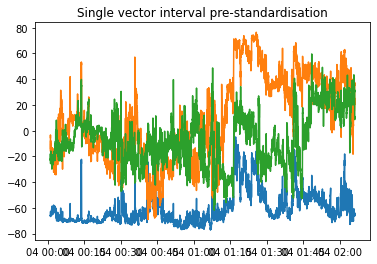

In [16]:
plt.plot(inputs_list_raw[0])
plt.title("Single vector interval pre-standardisation")

In [17]:
inputs_list[0]

,B_R,B_T,B_N
Time,,,
2018-11-04 00:01:09.000,-0.475468,-0.476889,-0.783802
2018-11-04 00:01:09.750,-0.452954,-0.417883,-0.838556
2018-11-04 00:01:10.500,-0.501703,-0.559193,-0.706698
2018-11-04 00:01:11.250,-0.493693,-0.733169,-0.583040
2018-11-04 00:01:12.000,-0.301922,-0.804441,-0.809686
...,...,...,...
2018-11-04 02:06:05.250,-0.441381,0.439272,1.662009
2018-11-04 02:06:06.000,-0.468951,0.583164,1.258127
2018-11-04 02:06:06.750,-0.441847,0.665954,0.929330


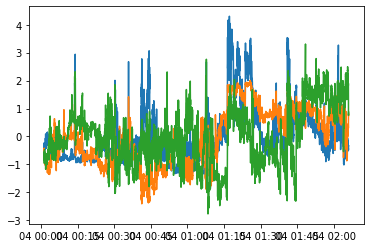

In [18]:
plt.plot(inputs_list[0])

In [19]:
# Confirming standardisation has worked property for each vector
# EACH IS STANDARDISED INDIVIDUALLY, good
print(inputs_list[0].mean())
print(inputs_list[0].std())

B_R    1.186012e-14
B_T    5.617729e-17
B_N    2.959410e-16
dtype: float64
B_R    1.0
B_T    1.0
B_N    1.0
dtype: float64


In [20]:
# Checking length of vector for number of lags
print(round(0.2*len(inputs_list_raw)))
print(round(0.2*len(inputs_list)))
# All good

# Checking loop function
#for i in inputs_std:
#    print(i)
for i in inputs_list:
    print(i.iloc[:,0])
    print(i.iloc[:,1])
    print(i.iloc[:,2])

1
1
Time
2018-11-04 00:01:09.000   -0.475468
2018-11-04 00:01:09.750   -0.452954
2018-11-04 00:01:10.500   -0.501703
2018-11-04 00:01:11.250   -0.493693
2018-11-04 00:01:12.000   -0.301922
                             ...   
2018-11-04 02:06:05.250   -0.441381
2018-11-04 02:06:06.000   -0.468951
2018-11-04 02:06:06.750   -0.441847
2018-11-04 02:06:07.500   -0.317415
2018-11-04 02:06:08.250   -0.326563
Freq: 750L, Name: B_R, Length: 10000, dtype: float64
Time
2018-11-04 00:01:09.000   -0.476889
2018-11-04 00:01:09.750   -0.417883
2018-11-04 00:01:10.500   -0.559193
2018-11-04 00:01:11.250   -0.733169
2018-11-04 00:01:12.000   -0.804441
                             ...   
2018-11-04 02:06:05.250    0.439272
2018-11-04 02:06:06.000    0.583164
2018-11-04 02:06:06.750    0.665954
2018-11-04 02:06:07.500    0.816459
2018-11-04 02:06:08.250    0.752632
Freq: 750L, Name: B_T, Length: 10000, dtype: float64
Time
2018-11-04 00:01:09.000   -0.783802
2018-11-04 00:01:09.750   -0.838556
2018-11-04 

Loading fortran sf outputs calculated externally using TurbAn

In [21]:
outputs_list_scalar = np.load('testing_scalar_sf.npy')
print(outputs_list_scalar.shape)

outputs_list = np.load('testing_vector_sf.npy') #This is an array
print(outputs_list.shape)

(5, 2000)
(5, 2000)


In [22]:
outputs_list_scalar

array([[0.        , 0.00502442, 0.01051052, ..., 1.76289805, 1.76397092,
        1.76497337],
       [0.        , 0.00948428, 0.0213922 , ..., 2.21191884, 2.2128427 ,
        2.2136874 ],
       [0.        , 0.02508674, 0.05556973, ..., 1.51895222, 1.51941003,
        1.51934591],
       [0.        , 0.01196332, 0.02585947, ..., 1.84438592, 1.84376067,
        1.84338456],
       [0.        , 0.01296738, 0.0280497 , ..., 1.53191031, 1.53199843,
        1.53179589]])

Now I have scalar and vector structure functions. I will plot them to investigate.

[[<matplotlib.lines.Line2D at 0x296a3d07f40>],

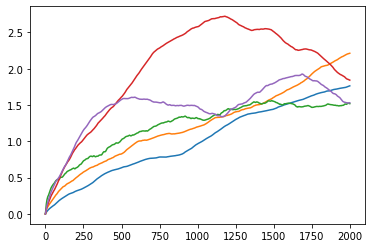

In [23]:
[plt.plot(outputs_list_scalar[i]) for i in range(5)]

[[<matplotlib.lines.Line2D at 0x296a3d89580>],

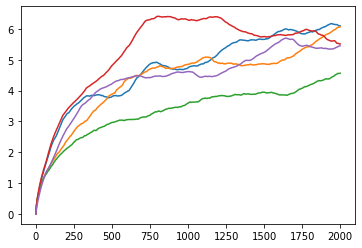

In [24]:
[plt.plot(outputs_list[i]) for i in range(5)]

I've checked that the fortran codes in my terminal_preprocessing.py code produce sensible-looking vector structure functions. Now I need to check the part of the code that copies and gaps the datasets

In [25]:
shuffler = np.random.permutation(len(inputs_list))
inputs_list_shuffled = [inputs_list[i] for i in shuffler]
outputs_list_shuffled = [outputs_list[i] for i in shuffler]

print("\n Here is the original order of inputs and outputs:")
[print(inputs_list[i][0:2]) for i in range(5)]
[print(outputs_list[i][0:2]) for i in range(5)]


 Here is the original order of inputs and outputs:
                              B_R       B_T       B_N
Time                                                 
2018-11-04 00:01:09.000 -0.475468 -0.476889 -0.783802
2018-11-04 00:01:09.750 -0.452954 -0.417883 -0.838556
                              B_R       B_T       B_N
Time                                                 
2018-11-04 02:06:09.000 -0.774004  0.681171  0.312103
2018-11-04 02:06:09.750 -0.785438  0.669663  0.309111
                              B_R       B_T       B_N
Time                                                 
2018-11-04 04:11:09.000 -0.918794 -0.008448 -0.502154
2018-11-04 04:11:09.750 -1.005445 -0.143132 -0.493707
                              B_R       B_T       B_N
Time                                                 
2018-11-04 06:16:09.000  0.571253 -1.186474 -0.650571
2018-11-04 06:16:09.750  0.576334 -1.289244 -0.596757
                              B_R       B_T       B_N
Time                          

[None, None, None, None, None]

In [26]:
print("\n Here is the shuffled order of inputs and outputs:")
[print(inputs_list_shuffled[i][0:2]) for i in range(5)]
[print(outputs_list_shuffled[i][0:2]) for i in range(5)]


 Here is the shuffled order of inputs and outputs:
                              B_R       B_T       B_N
Time                                                 
2018-11-04 08:21:09.000 -0.128086  0.688638  1.541180
2018-11-04 08:21:09.750 -0.110982  1.082115  1.127996
                              B_R       B_T       B_N
Time                                                 
2018-11-04 02:06:09.000 -0.774004  0.681171  0.312103
2018-11-04 02:06:09.750 -0.785438  0.669663  0.309111
                              B_R       B_T       B_N
Time                                                 
2018-11-04 00:01:09.000 -0.475468 -0.476889 -0.783802
2018-11-04 00:01:09.750 -0.452954 -0.417883 -0.838556
                              B_R       B_T       B_N
Time                                                 
2018-11-04 06:16:09.000  0.571253 -1.186474 -0.650571
2018-11-04 06:16:09.750  0.576334 -1.289244 -0.596757
                              B_R       B_T       B_N
Time                          

[None, None, None, None, None]

Yes, they are shuffling correctly, inputs remaining aligned to outputs. Now I am splitting into training and testing sets

In [27]:
train_test_boundary = int(0.8*len(inputs_list_shuffled))

inputs_train_list = inputs_list_shuffled[:train_test_boundary]
inputs_test_list = inputs_list_shuffled[train_test_boundary:]

outputs_train_list = outputs_list_shuffled[:train_test_boundary]
outputs_test_list = outputs_list_shuffled[train_test_boundary:]

In [28]:
inputs_test_list

[                              B_R       B_T       B_N
 Time                                                 
 2018-11-04 04:11:09.000 -0.918794 -0.008448 -0.502154
 2018-11-04 04:11:09.750 -1.005445 -0.143132 -0.493707
 2018-11-04 04:11:10.500 -1.022321 -0.291216 -0.455211
 2018-11-04 04:11:11.250 -1.061020 -0.387957 -0.421160
 2018-11-04 04:11:12.000 -1.066729 -0.301664 -0.389256
 ...                           ...       ...       ...
 2018-11-04 06:16:05.250 -0.770848 -1.688078 -1.535426
 2018-11-04 06:16:06.000 -0.803667 -1.747711 -1.479285
 2018-11-04 06:16:06.750 -0.752158 -1.817150 -1.494135
 2018-11-04 06:16:07.500 -0.830555 -1.505089 -1.556186
 2018-11-04 06:16:08.250 -0.855289 -1.447987 -1.533937
 
 [10000 rows x 3 columns]]

In [29]:
print("The dimensions of the input training data is", 
len(inputs_train_list), 'x', inputs_train_list[0].shape)

print("The dimensions of the output training data is", 
len(outputs_train_list), 'x', outputs_train_list[0].shape)

print("The dimensions of the input test data is", 
len(inputs_test_list), 'x', inputs_test_list[0].shape)

print("The dimensions of the output test data is", 
len(outputs_test_list), 'x', outputs_test_list[0].shape)

The dimensions of the input training data is 4 x (10000, 3)
The dimensions of the output training data is 4 x (2000,)
The dimensions of the input test data is 1 x (10000, 3)
The dimensions of the output test data is 1 x (2000,)


## Putting all steps above into a function

### Helper functions

In [30]:
def calc_strfn(input_intervals):
    sfs = []

    for interval in input_intervals:
        r,s = ftsa.strfn_vec(ax = interval.iloc[:,0], 
                            ay = interval.iloc[:,1], 
                            az = interval.iloc[:,2], 
                            lags = range(0, round(0.2*len(input_intervals))), 
                            orders = [2], 
                            dt = dt) #Second order structure function
        sfs.append(s[0])
    return sfs

def prepare_array_for_output_old(dataset):
            list_of_vectors = []
            list_of_flat_vectors = []
            for i in range(len(dataset)):
                vector = np.array(dataset)[i].transpose()
                list_of_vectors.append(vector)
                list_of_flat_vectors.append(vector.flatten())
            array_of_vectors = np.array(list_of_vectors, dtype='float16') # Because Raapoi apparently doesn't have space for 64 version
            array_of_flat_vectors = np.array(list_of_flat_vectors, dtype='float16')
            return(array_of_vectors, array_of_flat_vectors)

def prepare_array_for_output(dataset):
    list_of_vectors = []
    list_of_flat_vectors = []
    for i in range(len(dataset)):
        vector = []
        flat_vector = []
        for j in range(dataset[0].shape):
            vec_comp = dataset[i].iloc[:,j].to_numpy()
            vector.append(vec_comp)
        list_of_vectors.append(vector)
    array_of_vectors = np.array(list_of_vectors)

    list_of_flat_vectors = []
    for i in range(len(array_of_vectors)):
        list_of_flat_vectors.append(array_of_vectors[i].flatten())

    array_of_flat_vectors = np.array(list_of_flat_vectors)
    
    return(array_of_vectors, array_of_flat_vectors)

In [31]:
def mag_interval_pipeline_split(df, n_values, n_subsets, dt, test_size):

    inputs_list_raw = np.split(df[:n_values], n_subsets) 

    plt.plot(inputs_list_raw[0])
    plt.title("Single clean vector interval pre-standardisation")
    plt.show()

    inputs_list = [calcs.normalize(i) for i in inputs_list_raw]

    plt.plot(inputs_list[0])
    plt.title("Single clean vector interval post-standardisation")
    plt.show()

    print("Summary stats of a single clean vector interval post-standardisation")
    print(inputs_list[0].mean())
    print(inputs_list[0].std())

    random.seed(5)

    shuffler = np.random.permutation(len(inputs_list))
    inputs_list_shuffled = [inputs_list[i] for i in shuffler]

    # outputs_list_shuffled = calc_strfn(inputs_list_shuffled)

    #plt.plot(outputs_list_shuffled[0])
    #plt.title("A vector structure function (the expected output)")
    #plt.show()

    train_test_boundary = int((1-test_size)*len(inputs_list_shuffled))
    inputs_train_list = inputs_list_shuffled[:train_test_boundary]
    inputs_test_list = inputs_list_shuffled[train_test_boundary:]

    if test_size < 1:
        print("The dimensions of the input training data is", 
        len(inputs_train_list), 'x', inputs_train_list[0].shape)

    print("The dimensions of the input test data is", 
    len(inputs_test_list), 'x', inputs_test_list[0].shape)

    return (inputs_train_list, inputs_test_list)

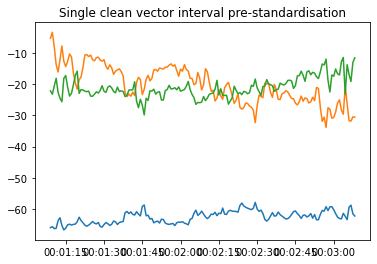

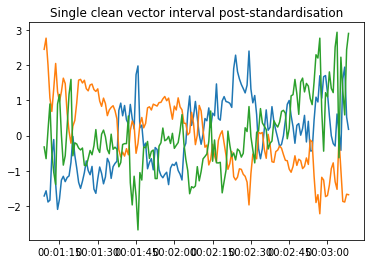

Summary stats of a single clean vector interval post-standardisation
B_R    9.534387e-15
B_T   -1.425249e-15
B_N    3.752554e-15
dtype: float64
B_R    1.0
B_T    1.0
B_N    1.0
dtype: float64
The dimensions of the input training data is 4 x (160, 3)
The dimensions of the input test data is 1 x (160, 3)


In [32]:
(psp_inputs_train_list, 
psp_inputs_test_list) = mag_interval_pipeline_split(df, 
n_values = 800, 
n_subsets = 5, 
dt = 0.75, 
test_size = 0.2)

Now I will run the copy and run the gap_and_fill_intervals() function to make sure this works fine for the vectors. I already know the gapping itself is fine - I just need to check the data transformation and output works OK.

In [33]:
psp_inputs_train_list

[                              B_R       B_T       B_N
 Time                                                 
 2018-11-04 00:07:09.000  0.186697 -1.181442  0.213083
 2018-11-04 00:07:09.750  0.153834 -1.252114  0.352192
 2018-11-04 00:07:10.500 -0.016553 -1.175931  0.500165
 2018-11-04 00:07:11.250 -0.579437 -1.163862  0.395476
 2018-11-04 00:07:12.000  0.173606 -1.301546  0.439405
 ...                           ...       ...       ...
 2018-11-04 00:09:05.250  1.947759  1.772958 -0.346993
 2018-11-04 00:09:06.000  2.210935  1.983825 -0.472208
 2018-11-04 00:09:06.750  2.273871  2.416855 -0.740466
 2018-11-04 00:09:07.500  2.463803  2.570818 -0.776525
 2018-11-04 00:09:08.250  2.121819  2.570414 -0.769342
 
 [160 rows x 3 columns],
                               B_R       B_T       B_N
 Time                                                 
 2018-11-04 00:09:09.000  0.558594  1.120553 -0.647801
 2018-11-04 00:09:09.750  0.799399  1.455448 -0.684204
 2018-11-04 00:09:10.500  1.086458  1.

In [34]:
n_copies = 2
freq = '0.75S'
min_removal_percent = 30
max_removal_percent = 40

In [35]:
print(df.head())
print(df.iloc[0].dtype)

                               B_R        B_T        B_N
Time                                                    
2018-11-04 00:01:09.000 -66.008367  -5.284080 -22.126701
2018-11-04 00:01:09.750 -65.720354  -3.337923 -23.220996
2018-11-04 00:01:10.500 -66.343980  -7.998673 -20.585728
2018-11-04 00:01:11.250 -66.241503 -13.736805 -18.114344
2018-11-04 00:01:12.000 -63.788294 -16.087522 -22.644000
float64


In [36]:
df.iloc[:,0].to_numpy()

array([-66.00836706, -65.72035384, -66.34398021, ...,  -0.53706032,
        -2.0237708 ,  12.42228607])

In [37]:
df.astype('float16').head()

,B_R,B_T,B_N
Time,,,
2018-11-04 00:01:09.000,-66.00000,-5.285156,-22.125000
2018-11-04 00:01:09.750,-65.75000,-3.337891,-23.218750
2018-11-04 00:01:10.500,-66.37500,-8.000000,-20.578125
2018-11-04 00:01:11.250,-66.25000,-13.734375,-18.109375
2018-11-04 00:01:12.000,-63.78125,-16.093750,-22.640625


In [38]:
smaller = df.astype('float64')
print(smaller.head())
print(smaller.iloc[0].dtype)

                               B_R        B_T        B_N
Time                                                    
2018-11-04 00:01:09.000 -66.008367  -5.284080 -22.126701
2018-11-04 00:01:09.750 -65.720354  -3.337923 -23.220996
2018-11-04 00:01:10.500 -66.343980  -7.998673 -20.585728
2018-11-04 00:01:11.250 -66.241503 -13.736805 -18.114344
2018-11-04 00:01:12.000 -63.788294 -16.087522 -22.644000
float64


In [39]:
random.seed(5)

clean_inputs_list = psp_inputs_train_list * n_copies

gapped_inputs_list = []
filled_inputs_list = []
lint_inputs_list = []
prop_removed = np.array([])

for input in clean_inputs_list:
    
    gapped_input_raw = removal.remove_chunks_df(input, random.randint(min_removal_percent,max_removal_percent)/100, random.randint(3,20), 0.1)
    gapped_input = gapped_input_raw.resample(freq).mean()
    prop_removed = np.append(prop_removed, gapped_input_raw.missing.mean())

    gapped_input_std = calcs.normalize(gapped_input)
    # Correcting for standardisation of missing column
    gapped_input_std.iloc[:,3] = gapped_input.iloc[:,3]

    # Save standardised, gapped inputs to a list for outputting
    gapped_inputs_list.append(gapped_input_std)

    # Mean (0) imputing the artificially gapped inputs. This is because we need placeholder values for the network, and as an alternative to using a network in the first place 
    filled_input = gapped_input_std.fillna(0) 
    filled_inputs_list.append(filled_input)

    # Linear interpolating the artificially gapped inputs, as another alternative
    lint_input = gapped_input_std.interpolate() 
    lint_inputs_list.append(lint_input)

#clean_outputs_list = calc_strfn(clean_inputs_list)
#gapped_outputs_list = calc_strfn(gapped_inputs_list)
#filled_outputs_list = calc_strfn(filled_inputs_list)
#lint_outputs_list = calc_strfn(lint_inputs_list)


In [40]:
type(prop_removed)

numpy.ndarray

In [41]:
gapped_inputs_list

[                              B_R       B_T       B_N  missing
 Time                                                          
 2018-11-04 00:07:09.000  0.222711 -1.258345  0.151412      0.0
 2018-11-04 00:07:09.750       NaN       NaN       NaN      1.0
 2018-11-04 00:07:10.500       NaN       NaN       NaN      1.0
 2018-11-04 00:07:11.250       NaN       NaN       NaN      1.0
 2018-11-04 00:07:12.000       NaN       NaN       NaN      1.0
 ...                           ...       ...       ...      ...
 2018-11-04 00:09:05.250  1.874988  1.528245 -0.450580      0.0
 2018-11-04 00:09:06.000  2.121907  1.727134 -0.585166      0.0
 2018-11-04 00:09:06.750  2.180955  2.135569 -0.873500      0.0
 2018-11-04 00:09:07.500  2.359155  2.280787 -0.912258      0.0
 2018-11-04 00:09:08.250  2.038296  2.280406 -0.904537      0.0
 
 [160 rows x 4 columns],
                               B_R       B_T       B_N  missing
 Time                                                          
 2018-11-04 0

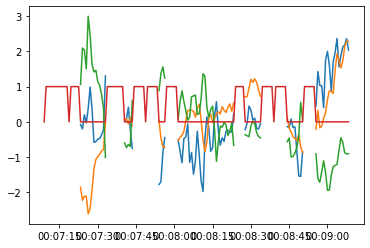

In [42]:
plt.plot(gapped_inputs_list[0])

In [43]:
    # fig, axs = plt.subplots(8, 2, figsize = (10,30))
    # ind = 4

    # axs[0,0].plot(clean_inputs_list[0])
    # axs[1,0].plot(clean_inputs_list[ind])
    # axs[0,1].plot(clean_outputs_list[0])
    # axs[1,1].plot(clean_outputs_list[ind])
    # axs[0,0].set_title("Copies of clean interval")
    # axs[0,1].set_title("Corresponding structure functions")
    # axs[1,0].set_xticks([])

    # axs[2,0].plot(gapped_inputs_list[0])
    # axs[3,0].plot(gapped_inputs_list[ind])
    # axs[2,1].plot(gapped_outputs_list[0])
    # axs[3,1].plot(gapped_outputs_list[ind])
    # axs[2,0].set_title("Gapped copies of interval")
    # axs[3,0].set_xticks([])

    # axs[4,0].plot(filled_inputs_list[0])
    # axs[5,0].plot(filled_inputs_list[ind])
    # axs[4,1].plot(filled_outputs_list[0])
    # axs[5,1].plot(filled_outputs_list[ind])
    # axs[4,0].set_title("Filled copies of interval")
    # axs[5,0].set_xticks([])

    # axs[6,0].plot(lint_inputs_list[0])
    # axs[7,0].plot(lint_inputs_list[ind])
    # axs[6,1].plot(lint_outputs_list[0])
    # axs[7,1].plot(lint_outputs_list[ind])
    # axs[6,0].set_title("Interpolated copies of interval")
    # axs[7,0].set_xticks([])

    # fig.suptitle('Validating pre-processing')


In [44]:
clean_inputs_list[0].B_R

Time
2018-11-04 00:07:09.000    0.186697
2018-11-04 00:07:09.750    0.153834
2018-11-04 00:07:10.500   -0.016553
2018-11-04 00:07:11.250   -0.579437
2018-11-04 00:07:12.000    0.173606
                             ...   
2018-11-04 00:09:05.250    1.947759
2018-11-04 00:09:06.000    2.210935
2018-11-04 00:09:06.750    2.273871
2018-11-04 00:09:07.500    2.463803
2018-11-04 00:09:08.250    2.121819
Freq: 750L, Name: B_R, Length: 160, dtype: float64

### Plots for paper

In [54]:
inputs_list[0]

,B_R,B_T,B_N
Time,,,
2018-11-04 00:01:09.000,-0.475468,-0.476889,-0.783802
2018-11-04 00:01:09.750,-0.452954,-0.417883,-0.838556
2018-11-04 00:01:10.500,-0.501703,-0.559193,-0.706698
2018-11-04 00:01:11.250,-0.493693,-0.733169,-0.583040
2018-11-04 00:01:12.000,-0.301922,-0.804441,-0.809686
...,...,...,...
2018-11-04 02:06:05.250,-0.441381,0.439272,1.662009
2018-11-04 02:06:06.000,-0.468951,0.583164,1.258127
2018-11-04 02:06:06.750,-0.441847,0.665954,0.929330


In [45]:
len(outputs_list_scalar)

5

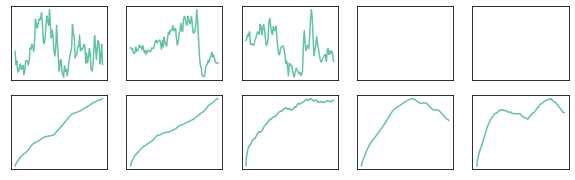

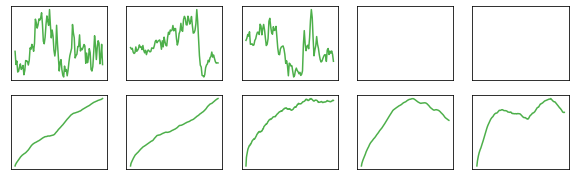

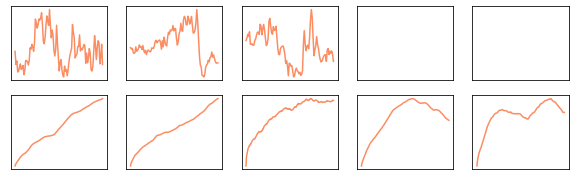

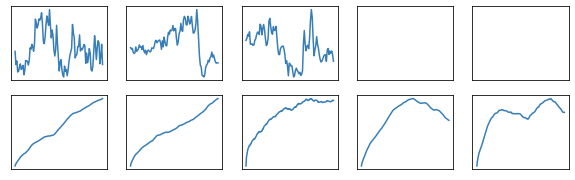

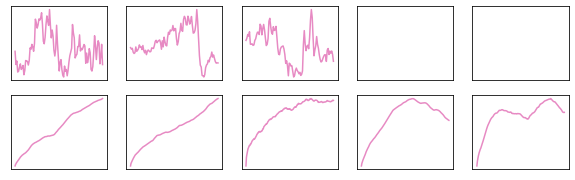

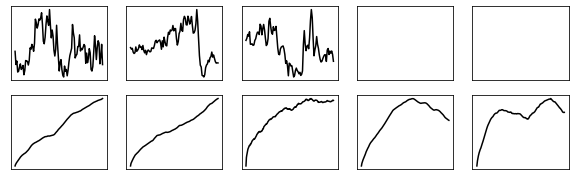

In [73]:
for col in ["#66c2a5", "#4daf4a", "#fc8d62", '#377eb8', "#e78ac3", "black"]:
    fig, axs = plt.subplots(2, 5, figsize = (10,3))
    axs[0,0].plot(inputs_list[0][200:300]["B_R"], color = col)
    axs[0,1].plot(inputs_list[1][200:300]["B_R"], color = col)
    axs[0,2].plot(inputs_list[2][200:300]["B_R"], color = col)
    axs[1,0].plot(outputs_list_scalar[0], color = col)
    axs[1,1].plot(outputs_list_scalar[1], color = col)
    axs[1,2].plot(outputs_list_scalar[2], color = col)
    axs[1,3].plot(outputs_list_scalar[3], color = col)
    axs[1,4].plot(outputs_list_scalar[4], color = col)
    # axs[0].plot(clean_inputs_list[0].B_T)
    # axs[1].plot(clean_inputs_list[1].B_T)
    # axs[2].plot(clean_inputs_list[2].B_T)
    axs[0,0].xaxis.set_visible(False)
    axs[0,0].yaxis.set_visible(False)
    axs[0,1].xaxis.set_visible(False)
    axs[0,1].yaxis.set_visible(False)
    axs[0,2].xaxis.set_visible(False)
    axs[0,2].yaxis.set_visible(False)
    axs[1,0].xaxis.set_visible(False)
    axs[1,0].yaxis.set_visible(False)
    axs[1,1].xaxis.set_visible(False)
    axs[1,1].yaxis.set_visible(False)
    axs[1,2].xaxis.set_visible(False)
    axs[1,2].yaxis.set_visible(False)
    axs[1,3].xaxis.set_visible(False)
    axs[1,3].yaxis.set_visible(False)
    axs[0,3].xaxis.set_visible(False)
    axs[0,3].yaxis.set_visible(False)
    axs[1,4].xaxis.set_visible(False)
    axs[1,4].yaxis.set_visible(False)
    axs[0,4].xaxis.set_visible(False)
    axs[0,4].yaxis.set_visible(False)
    plt.show()

In [75]:
clean_inputs, clean_inputs_flat = prepare_array_for_output(clean_inputs_list)
gapped_inputs, gapped_inputs_flat = prepare_array_for_output(gapped_inputs_list)
filled_inputs, filled_inputs_flat = prepare_array_for_output(filled_inputs_list)
lint_inputs, lint_inputs_flat = prepare_array_for_output(lint_inputs_list)

clean_outputs = prepare_array_for_output(clean_outputs_list)[0]
gapped_outputs = prepare_array_for_output(gapped_outputs_list)[0]
filled_outputs = prepare_array_for_output(filled_outputs_list)[0]
lint_outputs = prepare_array_for_output(lint_outputs_list)[0]

TypeError: 'tuple' object cannot be interpreted as an integer

In [255]:
clean_inputs_list

[                              B_R       B_T       B_N
 Time                                                 
 2018-11-04 00:13:39.000  1.920562  3.448650  2.198143
 2018-11-04 00:13:39.750  4.674472  4.041771  3.800491
 2018-11-04 00:13:40.500  5.255240  4.036648  4.102657
 2018-11-04 00:13:41.250  3.805218  3.454894  3.738502
 2018-11-04 00:13:42.000  2.752541  3.181531  3.458817
 ...                           ...       ...       ...
 2018-11-04 00:26:05.250  0.318533 -1.151105 -0.001250
 2018-11-04 00:26:06.000  0.401099 -1.095374 -0.551369
 2018-11-04 00:26:06.750  0.301541 -1.042064 -0.719513
 2018-11-04 00:26:07.500  0.389543 -1.162964 -0.473659
 2018-11-04 00:26:08.250  0.424746 -1.162655 -0.553995
 
 [1000 rows x 3 columns],
                               B_R       B_T       B_N
 Time                                                 
 2018-11-04 00:01:09.000  0.565923 -0.374492 -1.264682
 2018-11-04 00:01:09.750  0.660224 -0.239447 -1.374290
 2018-11-04 00:01:10.500  0.456037 -0

In [163]:
for j in range(clean_inputs_list[0].shape):
    print(j)

0
1
2


In [256]:
list_of_vectors = []
list_of_flat_vectors = []
for i in range(len(clean_inputs_list)):
    vector = []
    flat_vector = []
    for j in range(clean_inputs_list[0].shape):
        vec_comp = clean_inputs_list[i].iloc[:,j].to_numpy()
        vector.append(vec_comp)
    list_of_vectors.append(vector)
array_of_vectors = np.array(list_of_vectors)

list_of_flat_vectors = []
for i in range(len(array_of_vectors)):
    list_of_flat_vectors.append(array_of_vectors[i].flatten())

array_of_flat_vectors = np.array(list_of_flat_vectors)

In [242]:
print(clean_inputs.shape)
print(array_of_vectors.shape)
print(array_of_flat_vectors.shape)

(12, 3, 1000)
(12, 3, 1000)
(12, 3000)


In [243]:
clean_inputs_list[0]

,B_R,B_T,B_N
Time,,,
2018-11-04 00:38:39.000,-1.028898,1.414944,-0.137163
2018-11-04 00:38:39.750,-1.050642,1.371780,-0.231022
2018-11-04 00:38:40.500,-1.029488,1.360159,-0.141441
2018-11-04 00:38:41.250,-0.945027,1.272762,-0.278252
2018-11-04 00:38:42.000,-0.866305,1.237221,-0.584101
...,...,...,...
2018-11-04 00:51:05.250,-0.835464,0.638262,0.023756
2018-11-04 00:51:06.000,-0.956356,0.808229,-0.108205
2018-11-04 00:51:06.750,-0.749299,0.304656,0.458186


In [244]:
array_of_vectors[0]

array([[-1.02889755, -1.05064202, -1.02948826, ..., -0.74929932,
        -0.70418778, -0.63577699],
       [ 1.41494396,  1.3717796 ,  1.36015897, ...,  0.3046555 ,
         0.03994172,  0.02237679],
       [-0.13716252, -0.23102162, -0.14144092, ...,  0.45818638,
         1.41866019,  1.28385894]])

In [245]:
array_of_flat_vectors[0]

array([-1.02889755, -1.05064202, -1.02948826, ...,  0.45818638,
        1.41866019,  1.28385894])

B_R   -1.028898
B_T    1.414944
B_N   -0.137163
Name: 2018-11-04 00:38:39, dtype: float64

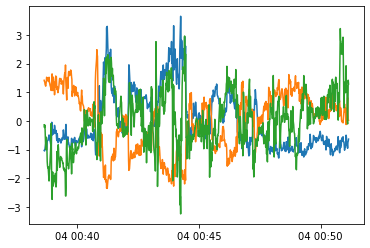

In [171]:
plt.plot(clean_inputs_list[0])
clean_inputs_list[0].iloc[0]

float16


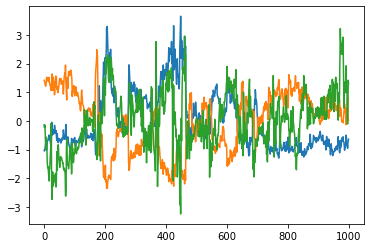

In [172]:
plt.plot(clean_inputs[0][0])
plt.plot(clean_inputs[0])
plt.plot(clean_inputs[0][2])
print(clean_inputs[0].dtype)

float64


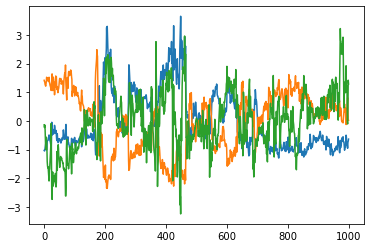

In [249]:
plt.plot(array_of_vectors[0][0])
plt.plot(array_of_vectors[0])
plt.plot(array_of_vectors[0][2])
print(array_of_vectors[0].dtype)

float64


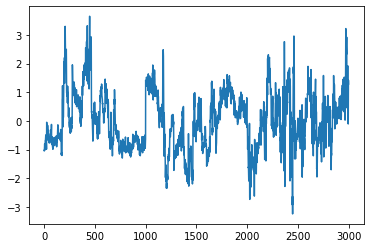

In [250]:
plt.plot(array_of_flat_vectors[0])
print(array_of_vectors[0].dtype)

Original interval


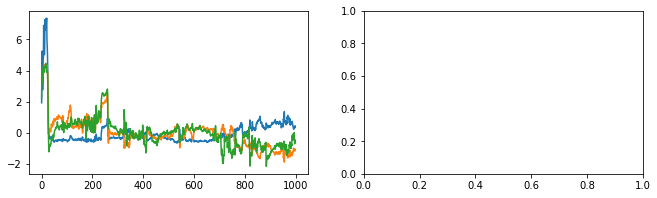

In [196]:
print("Original interval")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,3))
ax1.plot(clean_inputs[0][0])
ax1.plot(clean_inputs[0])
ax1.plot(clean_inputs[0][2])
plt.show()

# print("Copies of interval")
# fig, axs = plt.subplots(2, 2, figsize = (11,7))
# axs[0,0].plot(input_copies_pregapped[0])
# axs[1,0].plot(input_copies_pregapped[4])
# axs[0,1].plot(output_copies[0])
# axs[1,1].plot(output_copies[4])
# plt.show()

# print("Gapped copies of interval")
# fig, axs = plt.subplots(2, 2, figsize = (11,7))
# axs[0,0].plot(gapped_inputs_list[0])
# axs[1,0].plot(gapped_inputs_list[4])
# plt.show()

# print("Zero-filled gapped copies of interval")
# fig, axs = plt.subplots(2, 2, figsize = (11,7))
# axs[0,0].plot(filled_inputs_list[0])
# axs[1,0].plot(filled_inputs_list[4])
# plt.show()

# print("Interpolated gapped copies of interval")
# fig, axs = plt.subplots(2, 2, figsize = (11,7))
# axs[0,0].plot(lint_inputs_list[0])
# axs[1,0].plot(lint_inputs_list[4])
# plt.show()

In [174]:
filled_inputs_list[0]

,B_R,B_T,B_N,missing
Time,,,,
2018-11-04 00:38:39.000,-1.230832,1.750731,-0.124420,0.0
2018-11-04 00:38:39.750,-1.255053,1.701688,-0.222342,0.0
2018-11-04 00:38:40.500,-1.231490,1.688485,-0.128884,0.0
2018-11-04 00:38:41.250,-1.137410,1.589185,-0.271617,0.0
2018-11-04 00:38:42.000,-1.049722,1.548804,-0.590707,0.0
...,...,...,...,...
2018-11-04 00:51:05.250,-1.015368,0.868271,0.043466,0.0
2018-11-04 00:51:06.000,-1.150028,1.061386,-0.094209,0.0
2018-11-04 00:51:06.750,-0.919390,0.489229,0.496703,0.0


In [175]:
print(filled_inputs[0])
print(filled_inputs[0].shape)

[[-1.23083212 -1.25505312 -1.23149011 ... -0.91938969 -0.86914028
  -0.79293799]
 [ 1.75073099  1.70168796  1.68848469 ...  0.48922928  0.18846339
   0.16850624]
 [-0.12441989 -0.22234242 -0.12888351 ...  0.4967034   1.49875891
   1.35812173]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
(4, 1000)


In [178]:
print(filled_inputs_flat[0])
print(filled_inputs_flat[0].shape)

[-1.23083212 -1.25505312 -1.23149011 ...  0.          0.
  0.        ]
(4000,)


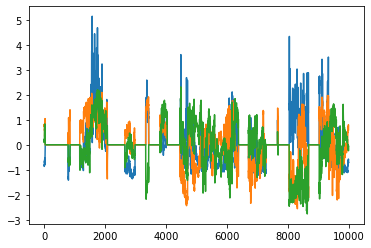

In [131]:
plt.plot(filled_inputs[0][0])
plt.plot(filled_inputs[0])
plt.plot(filled_inputs[0][2])

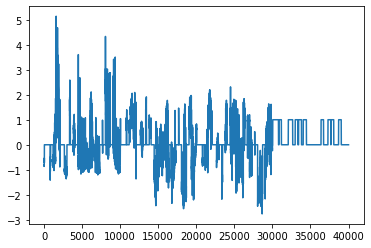

In [132]:
plt.plot(filled_inputs_flat[0])

## Turning above steps into a function

In [168]:
def mag_interval_pipeline_gap(inputs_list, n_copies, freq, dt, min_removal_percent, max_removal_percent):
    random.seed(5)

    clean_inputs_list = inputs_list * n_copies

    gapped_inputs_list = []
    filled_inputs_list = []
    lint_inputs_list = []

    for input in clean_inputs_list:
        
        gapped_input_raw = removal.remove_chunks_df(input, random.randint(min_removal_percent,max_removal_percent)/100, random.randint(3,20), 0.1)
        gapped_input = gapped_input_raw.resample(freq).mean()

        gapped_input_std = calcs.normalize(gapped_input)
        # Correcting for standardisation of missing column
        gapped_input_std.iloc[:,3] = gapped_input.iloc[:,3]

        # Save standardised, gapped inputs to a list for outputting
        gapped_inputs_list.append(gapped_input_std)

        # Mean (0) imputing the artificially gapped inputs. This is because we need placeholder values for the network, and as an alternative to using a network in the first place 
        filled_input = gapped_input_std.fillna(0) 
        filled_inputs_list.append(filled_input)

        # Linear interpolating the artificially gapped inputs, as another alternative
        lint_input = gapped_input_std.interpolate() 
        lint_inputs_list.append(lint_input)

    #clean_outputs_list = calc_strfn(clean_inputs_list)
    #gapped_outputs_list = calc_strfn(gapped_inputs_list)
    #filled_outputs_list = calc_strfn(filled_inputs_list)
    #lint_outputs_list = calc_strfn(lint_inputs_list)

    print("Copies of interval")
    fig, axs = plt.subplots(2, 2, figsize = (11,7))
    axs[0,0].plot(clean_inputs_list[0])
    axs[1,0].plot(clean_inputs_list[4])
    #axs[0,1].plot(clean_outputs_list[0])
    #axs[1,1].plot(clean_outputs_list[4])
    plt.show()

    print("Gapped copies of interval")
    fig, axs = plt.subplots(2, 2, figsize = (11,7))
    axs[0,0].plot(gapped_inputs_list[0])
    axs[1,0].plot(gapped_inputs_list[4])
    plt.show()

    print("Zero-filled gapped copies of interval")
    fig, axs = plt.subplots(2, 2, figsize = (11,7))
    axs[0,0].plot(filled_inputs_list[0])
    axs[1,0].plot(filled_inputs_list[4])
    plt.show()

    print("Interpolated gapped copies of interval")
    fig, axs = plt.subplots(2, 2, figsize = (11,7))
    axs[0,0].plot(lint_inputs_list[0])
    axs[1,0].plot(lint_inputs_list[4])
    plt.show()

    clean_inputs, clean_inputs_flat = prepare_array_for_output(clean_inputs_list)
    gapped_inputs, gapped_inputs_flat = prepare_array_for_output(gapped_inputs_list)
    filled_inputs, filled_inputs_flat = prepare_array_for_output(filled_inputs_list)
    lint_inputs, lint_inputs_flat = prepare_array_for_output(lint_inputs_list)

    #clean_outputs = prepare_array_for_output(clean_outputs_list)[0]
    #gapped_outputs = prepare_array_for_output(gapped_outputs_list)[0]
    #filled_outputs = prepare_array_for_output(filled_outputs_list)[0]
    #lint_outputs = prepare_array_for_output(lint_outputs_list)[0]

    return (clean_inputs, 
    #clean_outputs,
    gapped_inputs,
    #gapped_outputs,
    filled_inputs,
    filled_inputs_flat,
    #filled_outputs,
    lint_inputs,
    lint_inputs_flat
    #,
    #lint_outputs
    )

Copies of interval


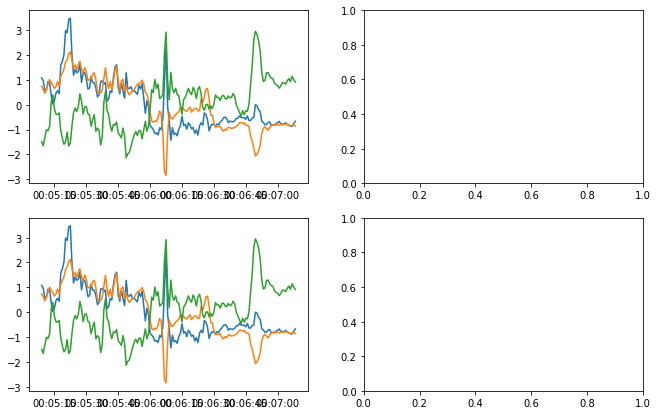

Gapped copies of interval


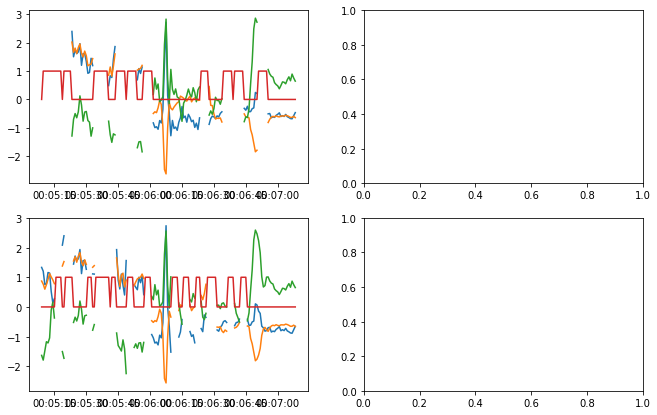

Zero-filled gapped copies of interval


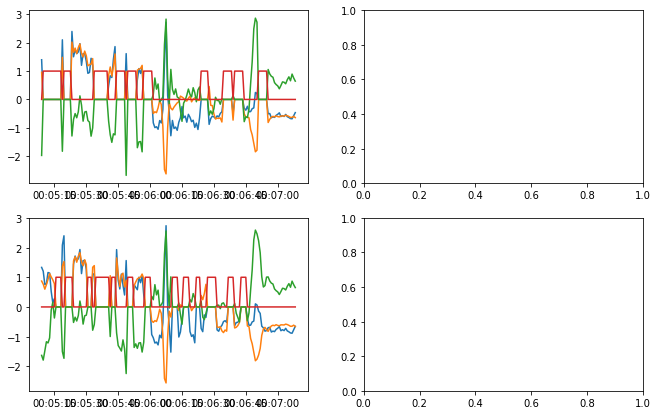

Interpolated gapped copies of interval


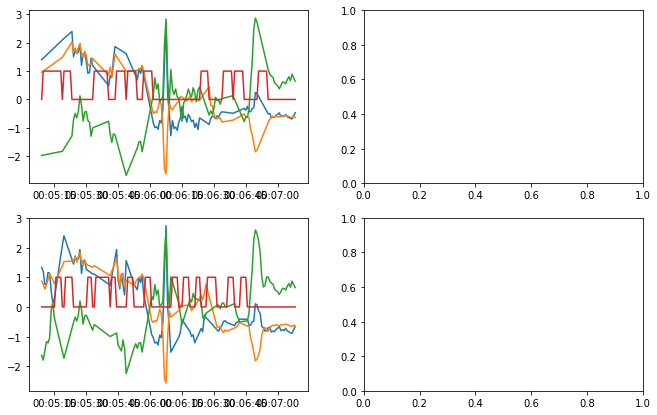

TypeError: 'tuple' object cannot be interpreted as an integer

In [169]:
(psp_clean_inputs_train, 
#psp_clean_outputs_train,
psp_gapped_inputs_train,
#psp_gapped_outputs_train,
psp_filled_inputs_train,
psp_filled_inputs_train_flat,
#psp_filled_outputs_train,
psp_lint_inputs_train,
psp_lint_inputs_train_flat
#,
#psp_lint_outputs_train
) = mag_interval_pipeline_gap(psp_inputs_train_list, 5, 
'0.75S', 0.75, 0, 50)


In [170]:
freq = '0.75S'

def gap_and_fill_intervals(inputs, outputs, times, min_removal, max_removal):
        """Gap each input (in different ways)
        For each interval, we remove between 10% and 50% of data across between 3 and 5 chunks, and then standardise the gapped interval
        We also impute a version with 0s for later calculation"""

        input_copies_pregapped = inputs * times
        output_copies = outputs * times
        
        gapped_inputs_list = []
        filled_inputs_list = []
        interp_inputs_list = []

        for i in range(len(input_copies_pregapped)):
            
            gapped_interval_raw = removal.remove_chunks_df(input_copies_pregapped[i], random.randint(min_removal,max_removal)/100, random.randint(3,20), 0.1)
            gapped_interval = gapped_interval_raw.resample(freq).mean()

            gapped_input_std = calcs.normalize(gapped_interval)
            # Correcting for standardisation of missing column
            gapped_input_std.iloc[:,3] = gapped_interval.iloc[:,3]

            # Save standardised, gapped intervals to a list for outputting
            gapped_inputs_list.append(gapped_input_std)

            # Mean (0) imputing the artificially gapped intervals. This is because we need placeholder values for the network, and as an alternative to using a network in the first place 
            filled_interval = gapped_input_std.fillna(0) 
            filled_inputs_list.append(filled_interval)

            # Linear interpolating the artificially gapped intervals, as another alternative
            interp_interval = gapped_input_std.interpolate() 
            interp_inputs_list.append(interp_interval)

        def prepare_array_for_output(dataset):
            list_of_vectors = []
            list_of_flat_vectors = []
            for i in range(len(dataset)):
                vector = np.array(dataset)[i].transpose()
                list_of_vectors.append(vector)
                list_of_flat_vectors.append(vector.flatten())
            array_of_vectors = np.array(list_of_vectors)
            array_of_flat_vectors = np.array(list_of_flat_vectors)
            return(array_of_vectors, array_of_flat_vectors)

        input_copies_pregapped_tidy, input_copies_pregapped_tidy_flat = prepare_array_for_output(input_copies_pregapped)
        gapped_inputs_list_tidy, gapped_inputs_list_tidy_flat = prepare_array_for_output(gapped_inputs_list)
        filled_inputs_list_tidy, filled_inputs_list_tidy_flat = prepare_array_for_output(filled_inputs_list)
        interp_inputs_list_tidy, interp_inputs_list_tidy_flat = prepare_array_for_output(interp_inputs_list)
        output_copies_tidy, output_copies_tidy_flat = prepare_array_for_output(output_copies)

        return (input_copies_pregapped_tidy, 
        gapped_inputs_list_tidy, 
        gapped_inputs_list_tidy_flat,
        filled_inputs_list_tidy, 
        filled_inputs_list_tidy_flat, 
        interp_inputs_list_tidy, 
        interp_inputs_list_tidy_flat, 
        output_copies_tidy)

In [171]:
#filled_vec = gap_and_fill_intervals(inputs_train_raw, outputs_train_raw, 3, min_removal = 30, max_removal = 50)
#inputs_train_pregapped, inputs_train_gapped,  inputs_train_filled,  inputs_train_interpolated,  outputs_train, input_copies_pregapped_tidy_flat, input_copies_pregapped_tidy_flat, gapped_inputs_list_tidy_flat, filled_inputs_list_tidy_flat, interp_inputs_list_tidy_flat,
#output_copies_tidy_flat = 
inputs, inputs_gapped, inputs_gapped_flat, inputs_filled, inputs_filled_flat, inputs_interp, inputs_interp_flat, outputs = gap_and_fill_intervals(inputs_train_raw, outputs_train_raw, 3, min_removal = 0, max_removal = 50)

NameError: name 'inputs_train_raw' is not defined

In [23]:
inputs_gapped[0][0]

NameError: name 'inputs_gapped' is not defined

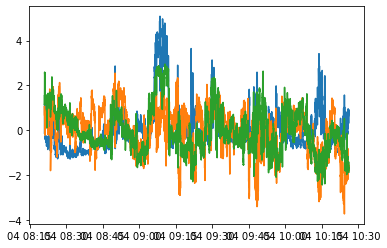

In [132]:
plt.plot(inputs_train_raw[2])

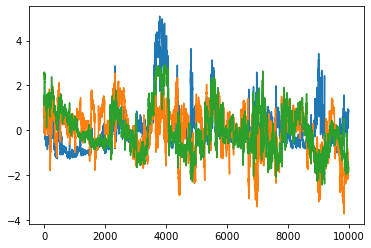

In [133]:
plt.plot(inputs[2][0])
plt.plot(inputs[2][1])
plt.plot(inputs[2][2])

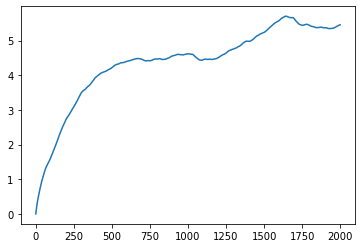

In [136]:
plt.plot(outputs[2])

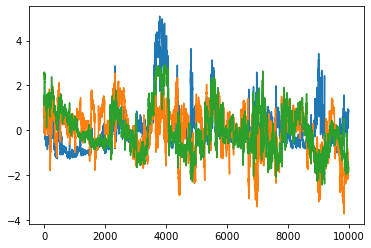

In [137]:
plt.plot(inputs[6][0])
plt.plot(inputs[6])
plt.plot(inputs[6][2])

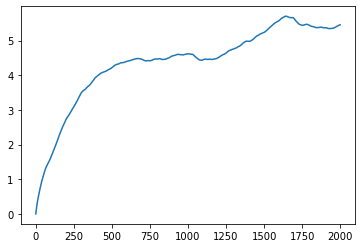

In [139]:
plt.plot(outputs[6])

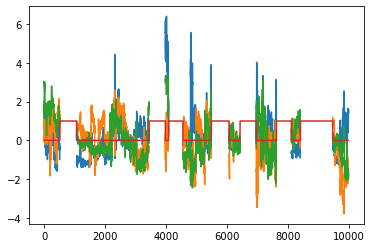

In [140]:
plt.plot(inputs_gapped[2][0])
plt.plot(inputs_gapped[2][1])
plt.plot(inputs_gapped[2][2])
plt.plot(inputs_gapped[2][3])

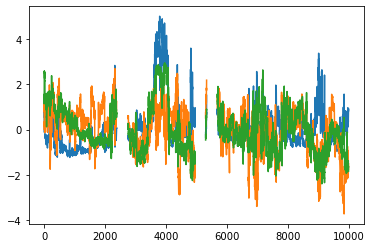

In [141]:
plt.plot(inputs_gapped[6][0])
plt.plot(inputs_gapped[6][1])
plt.plot(inputs_gapped[6][2])

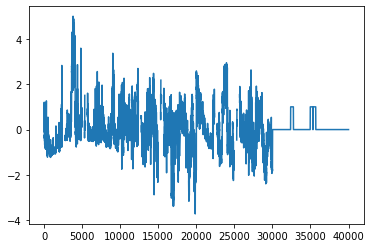

In [142]:
plt.plot(inputs_gapped_flat[6])

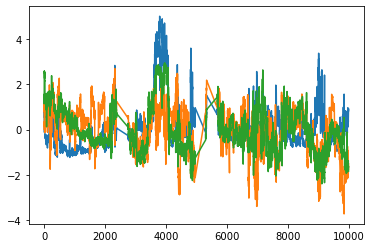

In [143]:
plt.plot(inputs_interp[6][0])
plt.plot(inputs_interp[6])
plt.plot(inputs_interp[6][2])

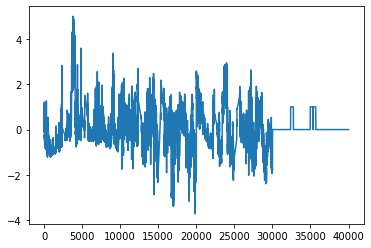

In [144]:
plt.plot(inputs_interp_flat[6])

In [158]:
inputs_interp[5]

array([[-0.8928171 , -0.98705736, -1.00541079, ..., -0.71158655,
        -0.79684912, -0.82374997],
       [ 0.0107863 , -0.13591477, -0.29721157, ..., -1.9593    ,
        -1.61939466, -1.55719775],
       [-0.4911609 , -0.48278077, -0.4445882 , ..., -1.47532966,
        -1.53689212, -1.51481858],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [121]:
df_list = []
for vector in inputs_interp:
    df = pd.DataFrame(vector.transpose())
    df_list.append(df)


NameError: name 'inputs_interp' is not defined

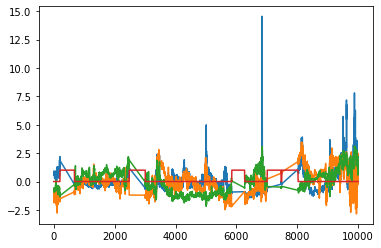

In [165]:
plt.plot(df_list[3])

# **FINISHED CHECKING VECTOR PRE-PROCESSING**

IndexError: index 0 is out of bounds for axis 0 with size 0

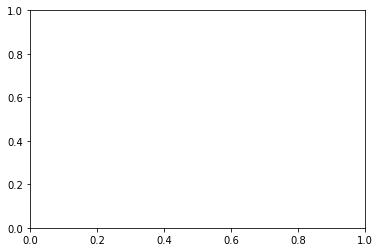

In [167]:
subset = df['2020-01-06 00:01:10':'2020-01-06 02:00:20']
subset.B_R.plot(title = "Ten seconds of data from PSP")

In [12]:
print(len(subset))

9534


In [13]:
sf_good = calcs.calc_struct_sdk(subset.B_N, 1/0.75, plot=False)

c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2


In [25]:
bad_data_1 = removal.remove_chunks_df(subset, 0.2, 5, 0.01)
bad_data_1 = bad_data_1.resample('0.7S').mean()
bad_data_2 = removal.remove_chunks_df(subset, 0.4, 5, 0.01)
bad_data_2 = bad_data_2.resample('0.7S').mean()
bad_data_3 = removal.remove_chunks_df(subset, 0.6, 5, 0.01)
bad_data_3 = bad_data_3.resample('0.7S').mean()

In [26]:
print(bad_data_1.B_R.isnull().sum()/len(bad_data_1))
print(bad_data_2.B_R.isnull().sum()/len(bad_data_2))
print(bad_data_3.B_R.isnull().sum()/len(bad_data_3))

print(len(bad_data_3))

#I need to create an indicator vector for whether data was removed or not
print(bad_data_3.B_R.isnull().head())

ind_missing = bad_data_3.B_R.isnull()
missing_ind = [int(i) for i in ind_missing]
sum(missing_ind) # This is number of missing values


0.2809593734703867
0.5139500734214391
0.6952520802741067
10215
Time
2018-11-04 00:01:10.000    False
2018-11-04 00:01:10.700    False
2018-11-04 00:01:11.400    False
2018-11-04 00:01:12.100    False
2018-11-04 00:01:12.800     True
Freq: 700L, Name: B_R, dtype: bool


7102

<AxesSubplot:xlabel='Time'>

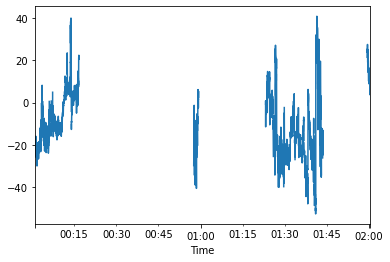

In [28]:
bad_data_3.B_N.plot()

In [29]:
sf_bad_1 = calcs.calc_struct_sdk(bad_data_1['B_N'], 1/0.75, plot=False)[1:2000]
sf_bad_2 = calcs.calc_struct_sdk(bad_data_2['B_N'], 1/0.75, plot=False)[1:2000]
sf_bad_3 = calcs.calc_struct_sdk(bad_data_3['B_N'], 1/0.75, plot=False)[1:2000]

c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [30]:
len(sf_bad_2[2])
sf_bad_2.tail()

,1,2,3,4
1528.50,15.190318,371.621034,11496.387821,410136.390348
1529.25,15.181728,373.094734,11626.304905,417604.490185
1530.00,15.209165,371.602223,11498.494223,410368.909869
1530.75,15.213316,371.692663,11546.787636,415639.692890
1531.50,15.248039,372.499454,11547.514765,414090.906993


<AxesSubplot:>

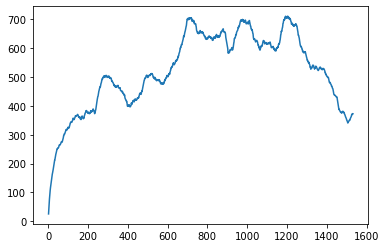

In [31]:
sf_bad_2[2].plot()

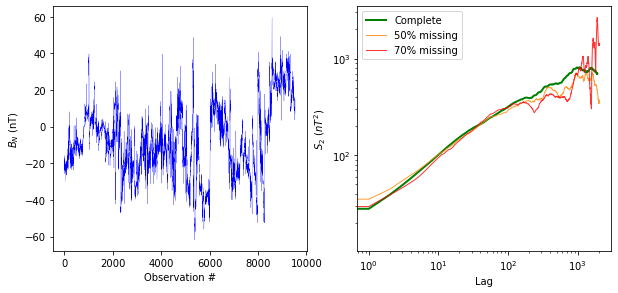

In [44]:
fig, ax = plt.subplots(1,2, figsize = (10,4.5))
ax[0].plot(subset.B_N.values, lw = 0.2, color = 'blue', label = 'Original complete')
ax.plot(sf_good[2].values, lw = 2, color = 'green', label = 'Complete')
#ax.plot(sf_bad_1[2].values, lw = 1.5, color = '#ffea00', label = '20% missing')
ax.plot(sf_bad_2[2].values, lw = 1,  color = '#ff8400', label = '50% missing', alpha = 0.8)
ax.plot(sf_bad_3[2].values, lw = 1, color = '#ff0000', label = '70% missing', alpha = 0.8)
ax.semilogx()
ax.semilogy()
ax[0].set(xlabel = 'Observation #', ylabel = '$B_N$ (nT)')
ax.set(xlabel = 'Lag', ylabel = '$S_2$ ($nT^2$)')
ax.legend()

## Plotting multiple sfs for different clean intervals

In [14]:
psp_data = read_cdfs(["data_raw\psp\psp_fld_l2_mag_rtn_2018110400_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110406_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110412_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110418_v01.cdf", 
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110500_v01.cdf",
                      "data_raw\psp\psp_fld_l2_mag_rtn_2018110506_v01.cdf"
                      ], 
                      {'epoch_mag_RTN':(0), 'psp_fld_l2_mag_RTN':(0,3), 'label_RTN':(0,3)})

psp_data_ready = extract_components(psp_data, var_name='psp_fld_l2_mag_RTN', label_name='label_RTN', time_var='epoch_mag_RTN', dim=3)

psp_df = pd.DataFrame(psp_data_ready)

psp_df['Time'] = pd.to_datetime('2000-01-01 12:00') + pd.to_timedelta(psp_df['epoch_mag_RTN'], unit= 'ns')
psp_df = psp_df.drop(columns = 'epoch_mag_RTN').set_index('Time')

print(psp_df.head())
print(psp_df.notnull().sum())
print(psp_df.isnull().sum())

df = psp_df

df = df.resample('0.75S').mean()
print(df.head())
print(df.notnull().sum())
print(df.isnull().sum())

reading file  data\PSP\psp_fld_l2_mag_rtn_2018110400_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110406_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110412_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110418_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110500_v01.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2018110506_v01.cdf
Done reading data
                                     B_R       B_T        B_N
Time                                                         
2018-11-04 00:01:09.188621440 -66.046837 -4.066133 -21.885740
2018-11-04 00:01:09.195448064 -66.016045 -4.151718 -21.756538
2018-11-04 00:01:09.202274688 -65.888741 -4.362415 -21.620611
2018-11-04 00:01:09.209101440 -65.950851 -4.364508 -21.652880
2018-11-04 00:01:09.215928064 -65.975548 -4.533356 -21.834236
B_R    32973889
B_T    32973889
B_N    32973889
dtype: int64
B_R    0
B_T    0
B_N    0
dtype: int64
                               B_R        B_T        B_N
Time                    

9602


c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

In [4]:
psp_data = read_cdfs([
                    "data\PSP\psp_fld_l2_mag_rtn_2020010100_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010106_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010200_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010218_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010300_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010306_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010318_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010400_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010406_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010418_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010500_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010506_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010512_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010600_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010606_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010612_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010618_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011706_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011712_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011718_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010800_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010806_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010818_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010900_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010906_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010912_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020010918_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011000_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011018_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011100_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011106_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011218_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011300_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011306_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011312_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011418_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011600_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011606_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011612_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011618_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011700_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011706_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011712_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011718_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011800_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011806_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011812_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011818_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011900_v02.cdf",
                    "data\PSP\psp_fld_l2_mag_rtn_2020011906_v02.cdf"
                    # ,
                    # "data\PSP\psp_fld_l2_mag_rtn_2020011912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020011918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012500_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012700_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012800_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012900_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020012918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020013118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020500_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021700_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020800_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020900_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020020918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021500_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021700_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021800_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021900_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020021918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022500_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022700_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022800_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022900_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020022918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020120918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121118_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121312_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121412_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121612_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121618_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020121918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122200_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122206_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122212_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122218_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122300_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122306_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122318_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122400_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122406_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122418_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122500_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122506_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122512_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122518_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122600_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122606_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122700_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122706_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122712_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122718_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122800_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122806_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122812_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122818_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122900_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122906_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122912_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020122918_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123000_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123006_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123012_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123018_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123100_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123106_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123112_v02.cdf",
                    # "data\PSP\psp_fld_l2_mag_rtn_2020123118_v02.cdf"
                      ], 
                      {'epoch_mag_RTN':(0), 'psp_fld_l2_mag_RTN':(0,3), 'label_RTN':(0,3)})

psp_data_ready = extract_components(psp_data, var_name='psp_fld_l2_mag_RTN', label_name='label_RTN', time_var='epoch_mag_RTN', dim=3)

psp_df = pd.DataFrame(psp_data_ready)

psp_df['Time'] = pd.to_datetime('2000-01-01 12:00') + pd.to_timedelta(psp_df['epoch_mag_RTN'], unit= 'ns')
psp_df = psp_df.drop(columns = 'epoch_mag_RTN').set_index('Time')


reading file  data\PSP\psp_fld_l2_mag_rtn_2020010100_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010106_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010200_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010218_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010300_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010306_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010318_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010400_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010406_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010418_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010500_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010506_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010512_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010600_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010606_v02.cdf
reading file  data\PSP\psp_fld_l2_mag_rtn_2020010612_v02.cdf
reading file  data\PSP\p

IndexError: positional indexers are out-of-bounds

In [5]:
print(psp_df.head())
print("Prop. missing:")
print(psp_df.isnull().sum()/len(psp_df))

#Finding longest continuous stretch with no missing data
a = psp_df.B_N.values  # Extract out relevant column from dataframe as array
m = np.concatenate(( [True], np.isnan(a), [True] ))  # Mask
ss = np.flatnonzero(m[1:] != m[:-1]).reshape(-1,2)   # Start-stop limits
start,stop = ss[(ss[:,1] - ss[:,0]).argmax()]  # Get max interval, interval limits
print(psp_df['B_N'][[start]])
print(psp_df['B_N'][[stop-1]])

                                    B_R       B_T       B_N
Time                                                       
2020-01-01 00:01:09.193929600 -5.073206  7.142778  0.547279
2020-01-01 00:01:09.303156352 -5.013732  7.020520  0.542291
2020-01-01 00:01:09.412383104 -4.950951  7.017061  0.606882
2020-01-01 00:01:09.521609728 -5.090410  7.100000  0.657209
2020-01-01 00:01:09.630836480 -5.127430  7.159261  0.625563
Prop. missing:
B_R    0.001204
B_T    0.001204
B_N    0.001204
dtype: float64
Time
2020-01-17 03:39:28.905106816    8.761111
Name: B_N, dtype: float64
Time
2020-01-19 12:01:09.183964800   -2.0241
Name: B_N, dtype: float64


In [7]:
df = psp_df[start:stop]
df = df.resample('0.75S').mean()
print(df.head())
print(df.tail())
print("Prop. missing:")
print(df.isnull().sum()/len(df))
print("Total length:")
len(df)

                               B_R       B_T       B_N
Time                                                  
2020-01-17 03:39:28.500  12.418741 -6.239118  8.688618
2020-01-17 03:39:29.250  12.668176 -6.231831  8.664589
2020-01-17 03:39:30.000  12.655800 -6.196922  8.562709
2020-01-17 03:39:30.750  12.754879 -6.381446  8.577011
2020-01-17 03:39:31.500  12.824819 -5.986252  8.619314
                               B_R        B_T       B_N
Time                                                   
2020-01-19 12:01:06.000  16.406514 -14.508160 -1.640483
2020-01-19 12:01:06.750  16.461229 -14.723584 -1.613172
2020-01-19 12:01:07.500  16.823964 -14.375939 -1.267606
2020-01-19 12:01:08.250  16.247518 -14.724260 -1.629420
2020-01-19 12:01:09.000  15.881047 -14.878241 -1.914949
Prop. missing:
B_R    0.0
B_T    0.0
B_N    0.0
dtype: float64
Total length:


270535

In [12]:
subset_1 = df['2020-01-17 04:00:00':'2020-01-17 06:00:00']
subset_2 = df['2020-01-17 06:00:00':'2020-01-17 08:00:00']
subset_3 = df['2020-01-17 08:00:00':'2020-01-17 10:00:00']
subset_4 = df['2020-01-17 10:00:00':'2020-01-17 12:00:00']
subset_5 = df['2020-01-17 12:00:00':'2020-01-17 14:00:00']

print(len(subset_1))

sf_1b = calcs.calc_struct_sdk(subset_1['B_N'], 1/0.75, plot=False)[1:2000]
sf_2b = calcs.calc_struct_sdk(subset_2['B_N'], 1/0.75, plot=False)[1:2000]
sf_3b = calcs.calc_struct_sdk(subset_3['B_N'], 1/0.75, plot=False)[1:2000]
sf_4b = calcs.calc_struct_sdk(subset_4['B_N'], 1/0.75, plot=False)[1:2000]
sf_5b = calcs.calc_struct_sdk(subset_5['B_N'], 1/0.75, plot=False)[1:2000]

9602


c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdk['2^2']=sdk['2']**2
c:\Users\spann\Documents\Summer research\data_files\calculate_stats_latest.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

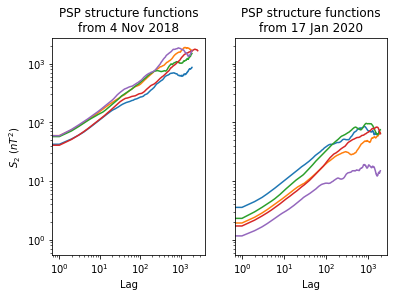

In [21]:
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].plot(sf_1[2].values)
ax[0].plot(sf_2[2].values)
ax[0].plot(sf_3[2].values)
ax[0].plot(sf_4[2].values)
ax[0].plot(sf_5[2].values)
ax[1].plot(sf_1b[2].values)
ax[1].plot(sf_2b[2].values)
ax[1].plot(sf_3b[2].values)
ax[1].plot(sf_4b[2].values)
ax[1].plot(sf_5b[2].values)
ax[1].semilogx()
ax[1].semilogy()
ax[0].semilogx()
ax[0].semilogy()
ax[0].set(xlabel = 'Lag', ylabel = '$S_2$ ($nT^2$)', title = "PSP structure functions\nfrom 4 Nov 2018")
ax[1].set(xlabel = 'Lag', ylabel = '', title = "PSP structure functions\nfrom 17 Jan 2020")

"2020-01-17 03:40"
"2020-01-19 12:00"

psp_df = psp_df["2020-01-17 03:40":"2020-01-19 12:00"]